In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# 예시: MyDrive/ott분석/amount_df.csv 라면
file_path = '/content/drive/MyDrive/SeD1st/1st Dataton/JDG/J.유료서비스_월평균_이용금액_21-23.csv'

amount_df = pd.read_csv(file_path)

# 데이터 일부 확인
print(amount_df.head())


   구분별(2)       2023        2023.1                2023.2  \
0  구분별(2)  사례수 (가구원)  5000원 미만 (%)  5000원-10000원  미만 (%)   
1      소계      29222           3.9                   3.8   
2      남자      14554           3.7                   4.1   
3      여자      14668           4.1                   3.6   
4  13~19세       1980           6.1                   4.1   

                  2023.3                 2023.4         2023.5         2023.6  \
0  10000원-15000원  미만 (%)  15000원-20000원  미만 (%)  20000원 이상 (%)  유료서비스 비이용 (%)   
1                    9.5                    3.7            4.0           75.0   
2                   10.7                    3.8            4.3           73.5   
3                    8.4                    3.7            3.8           76.5   
4                    6.4                    2.2            1.7           79.5   

          2023.7       2022  ...         2022.6         2022.7       2021  \
0  월 평균 이용금액 (원)  사례수 (가구원)  ...  유료서비스 비이용 (%)  월 평균 이용금액 (원)  사례수 (가구원)  

TypeError: can't multiply sequence by non-int of type 'float'

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) 

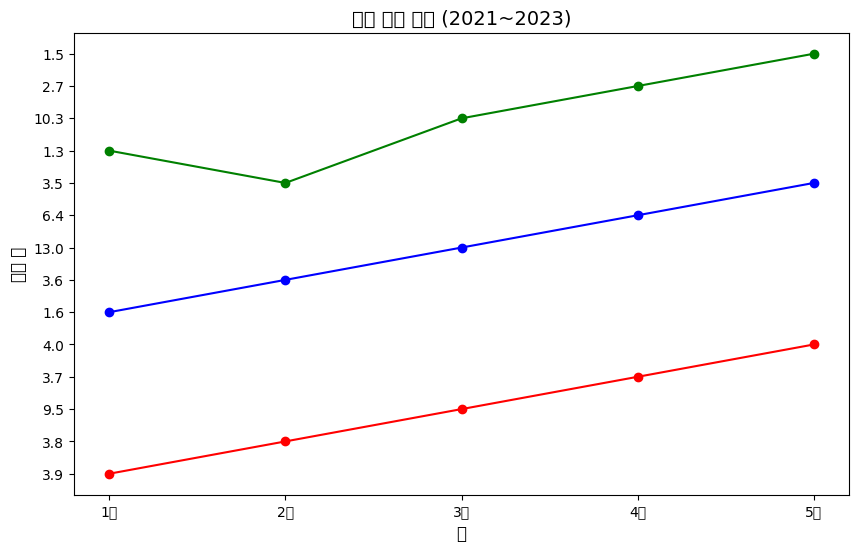

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 소계 행 추출
subtotal_row = amount_df[amount_df.iloc[:, 0] == '소계']

# 각 연도별 열
months = ['1', '2', '3', '4', '5']
columns_2023 = [f'2023.{m}' for m in months]
columns_2022 = [f'2022.{m}' for m in months]
columns_2021 = [f'2021.{m}' for m in months]

# 값 추출
values_2023 = subtotal_row[columns_2023].values.flatten()
values_2022 = subtotal_row[columns_2022].values.flatten()
values_2021 = subtotal_row[columns_2021].values.flatten()

x = [1, 2, 3, 4, 5]

# 그래프
plt.figure(figsize=(10, 6))

plt.plot(x, values_2023, marker='o', label='2023', color='red')
plt.plot(x, values_2022, marker='o', label='2022', color='blue')
plt.plot(x, values_2021, marker='o', label='2021', color='green')

plt.xticks(x, ['1월', '2월', '3월', '4월', '5월'])
plt.title('월별 소계 비교 (2021~2023)', fontsize=14)
plt.xlabel('월', fontsize=12)
plt.ylabel('소계 값', fontsize=12)

# ✅ y축 고정 (최소~최대 범위 설정)
ymin = min(values_2021.min(), values_2022.min(), values_2023.min()) * 0.95
ymax = max(values_2021.max(), values_2022.max(), values_2023.max()) * 1.05
plt.ylim(ymin, ymax)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [8]:
import pandas as pd

# 예시: MyDrive/ott분석/amount_df.csv 라면
file_path = '/content/drive/MyDrive/SeD1st/1st Dataton/JDG/J.이용빈도21-23.csv'

frequency_df = pd.read_csv(file_path)

# 데이터 일부 확인
print(frequency_df.head())


   구분별(2)       2023       2023.1      2023.2      2023.3      2023.4  \
0  구분별(2)  사례수 (가구원)  주 1일 미만 (%)  주 1-2일 (%)  주 3-4일 (%)  주 5-6일 (%)   
1      소계      29222          2.2        11.4        19.2        16.0   
2      남자      14554          2.5        11.4        18.5        16.3   
3      여자      14668          1.9        11.4        19.9        15.6   
4  13~19세       1980          2.4        12.5        19.0        16.9   

     2023.5       2023.6       2022       2022.1  ...      2022.4    2022.5  \
0  주 7일 (%)  OTT 비이용 (%)  사례수 (가구원)  주 1일 미만 (%)  ...  주 5-6일 (%)  주 7일 (%)   
1      18.0         33.2      31254          1.4  ...        16.6      21.5   
2      19.4         31.8      15567          1.4  ...        16.5      23.3   
3      16.6         34.6      15687          1.3  ...        16.8      19.7   
4      28.0         21.3       2149          2.2  ...        18.3      39.2   

        2022.6       2021       2021.1      2021.2      2021.3      2021.4  \
0  OTT 비

In [17]:
import pandas as pd

# 예시: MyDrive/ott분석/amount_df.csv 라면
file_path = '/content/drive/MyDrive/SeD1st/1st Dataton/JDG/J.이용료의_현재_금액_대비_최대_지불_의향_21-23.csv'

extend_df = pd.read_csv(file_path)

# 데이터 일부 확인
print(extend_df.head(2))

   구분별(2)       2021         2021.1          2021.2          2021.3  \
0  구분별(2)  사례수 (가구원)  1%~10% 미만 (%)  10%~20% 미만 (%)  20%~30% 미만 (%)   
1      소계      35626            6.7             4.4             2.0   

           2021.4          2021.5      2021.6                     2021.7  \
0  30%~40% 미만 (%)  40%~50% 미만 (%)  50% 이상 (%)  이용료가 인상된다면 이용할 의향이 없다 (%)   
1             0.5             0.3         0.2                        5.1   

    2021.8  ...   2022.8       2023         2023.1          2023.2  \
0  비이용 (%)  ...  비이용 (%)  사례수 (가구원)  1%~10% 미만 (%)  10%~20% 미만 (%)   
1     80.7  ...     71.9      29222            9.5             6.6   

           2023.3          2023.4          2023.5      2023.6  \
0  20%~30% 미만 (%)  30%~40% 미만 (%)  40%~50% 미만 (%)  50% 이상 (%)   
1             2.3             1.1             0.3         0.1   

                      2023.7   2023.8  
0  이용료가 인상된다면 이용할 의향이 없다 (%)  비이용 (%)  
1                        5.1     75.0  

[2 rows x 28 columns]


<ipython-input-24-2d9d7c8d25d9>:58: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-24-2d9d7c8d25d9>:58: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-24-2d9d7c8d25d9>:58: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-24-2d9d7c8d25d9>:58: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-24-2d9d7c8d25d9>:58: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-24-2d9d7c8d25d9>:58: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-24-2d9d7c8d25d9>:58: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-

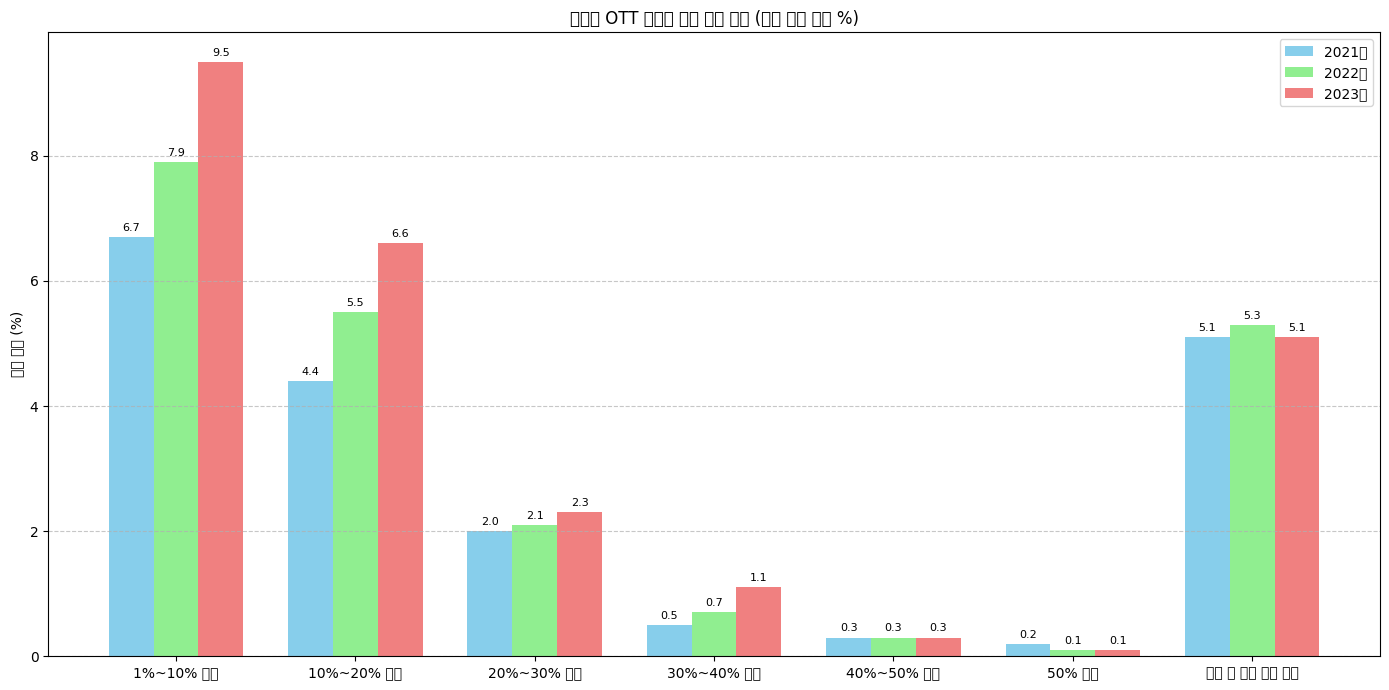

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io

# Set Korean font
plt.rc('font', family='Malgun Gothic') # Or another Korean font
plt.rcParams['axes.unicode_minus'] = False

# Recreate the DataFrame from the provided text data
data_string = """
구분별(2)        2021          2021.1          2021.2          2021.3          2021.4           2021.5          2021.6                               2021.7          2021.8          2022          2022.1          2022.2          2022.3          2022.4           2022.5          2022.6                               2022.7          2022.8          2023            2023.1          2023.2            2023.3          2023.4          2023.5          2023.6                                 2023.7          2023.8
구분별(2)    사례수 (가구원)    1%~10% 미만 (%)    10%~20% 미만 (%)    20%~30% 미만 (%)    30%~40% 미만 (%)    40%~50% 미만 (%)    50% 이상 (%)    이용료가 인상된다면 이용할 의향이 없다 (%)    비이용 (%)    비이용 (%)    사례수 (가구원)    1%~10% 미만 (%)    10%~20% 미만 (%)    20%~30% 미만 (%)    30%~40% 미만 (%)    40%~50% 미만 (%)    50% 이상 (%)    이용료가 인상된다면 이용할 의향이 없다 (%)    비이용 (%)
소계          35626              6.7                4.4                2.0                0.5                0.3              0.2                                   5.1              80.7            38571              7.9                5.5                2.1                0.7                0.3              0.1                                   5.3              77.9          29222                9.5                6.6                  2.3                1.1                0.3              0.1                                     5.1              75.0
"""

# Read the data using pandas, skipping the header row in the string
df = pd.read_csv(io.StringIO(data_string), sep='\s\s+', engine='python', skiprows=1)

# Extract relevant data for 2021, 2022, and 2023
categories = ['1%~10% 미만', '10%~20% 미만', '20%~30% 미만', '30%~40% 미만', '40%~50% 미만', '50% 이상', '인상 시 이용 의향 없음']

data_2021 = df.loc[1, ['2021.1', '2021.2', '2021.3', '2021.4', '2021.5', '2021.6', '2021.7']].astype(float).tolist()
data_2022 = df.loc[1, ['2022.1', '2022.2', '2022.3', '2022.4', '2022.5', '2022.6', '2022.7']].astype(float).tolist()
data_2023 = df.loc[1, ['2023.1', '2023.2', '2023.3', '2023.4', '2023.5', '2023.6', '2023.7']].astype(float).tolist()

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width, data_2021, width, label='2021년', color='skyblue')
rects2 = ax.bar(x, data_2022, width, label='2022년', color='lightgreen')
rects3 = ax.bar(x + width, data_2023, width, label='2023년', color='lightcoral')

# Add some text for labels, title and axes ticks
ax.set_ylabel('응답 비율 (%)')
ax.set_title('연도별 OTT 서비스 추가 지불 의향 (현재 금액 대비 %)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
print(amount_df.head(2))

   구분별(2)       2023        2023.1                2023.2  \
0  구분별(2)  사례수 (가구원)  5000원 미만 (%)  5000원-10000원  미만 (%)   
1      소계      29222           3.9                   3.8   

                  2023.3                 2023.4         2023.5         2023.6  \
0  10000원-15000원  미만 (%)  15000원-20000원  미만 (%)  20000원 이상 (%)  유료서비스 비이용 (%)   
1                    9.5                    3.7            4.0           75.0   

          2023.7       2022  ...         2022.6         2022.7       2021  \
0  월 평균 이용금액 (원)  사례수 (가구원)  ...  유료서비스 비이용 (%)  월 평균 이용금액 (원)  사례수 (가구원)   
1          12613      31254  ...           71.9          13443      35626   

         2021.1                2021.2                 2021.3  \
0  5000원 미만 (%)  5000원-10000원  미만 (%)  10000원-15000원  미만 (%)   
1           1.3                   3.5                   10.3   

                  2021.4         2021.5         2021.6         2021.7  
0  15000원-20000원  미만 (%)  20000원 이상 (%)  유료서비스 비이용 (%)  월 평균 이용금액 (원)  
1     

<ipython-input-38-5932df77e2fc>:60: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-38-5932df77e2fc>:60: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-38-5932df77e2fc>:60: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-38-5932df77e2fc>:60: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-38-5932df77e2fc>:60: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-38-5932df77e2fc>:60: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-38-5932df77e2fc>:60: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipy

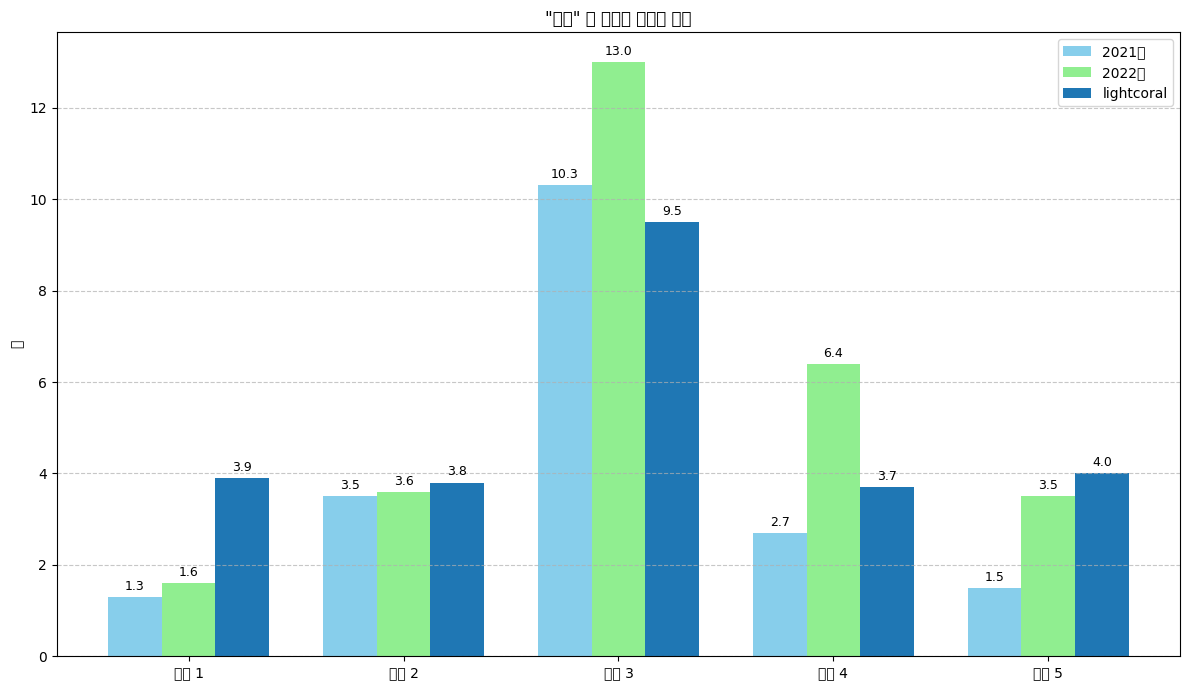

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set Korean font
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# Assuming amount_df is already loaded

# Define the categories (based on the .1 to .5 suffixes)
categories = ['구간 1', '구간 2', '구간 3', '구간 4', '구간 5']
years = ['2021', '2022', '2023']

# Find the "소계" row
sogye_row = amount_df[amount_df['구분별(2)'] == '소계'].iloc[0]

# Extract the data for each year
data_2021 = [sogye_row[f'2021.{i}'] for i in range(1, 6)]
data_2022 = [sogye_row[f'2022.{i}'] for i in range(1, 6)]
data_2023 = [sogye_row[f'2023.{i}'] for i in range(1, 6)]

# Convert data to numeric (in case it's read as object)
data_2021 = pd.to_numeric(data_2021, errors='coerce').tolist()
data_2022 = pd.to_numeric(data_2022, errors='coerce').tolist()
data_2023 = pd.to_numeric(data_2023, errors='coerce').tolist()

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width, data_2021, width, label='2021년', color='skyblue')
rects2 = ax.bar(x, data_2022, width, label='2022년', color='lightgreen')
rects3 = ax.bar(x + width, data_2023, width, label='lightcoral')

# Add some text for labels, title and axes ticks
ax.set_ylabel('값') # Adjust label as needed (e.g., '비율 (%)', '응답 수')
ax.set_title('"소계" 행 연도별 데이터 비교')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if not np.isnan(height):
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-39-05ccb59556c6>:60: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-39-05ccb59556c6>:60: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-39-05ccb59556c6>:60: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-39-05ccb59556c6>:60: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-39-05ccb59556c6>:60: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-39-05ccb59556c6>:60: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-39-05ccb59556c6>:60: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipy

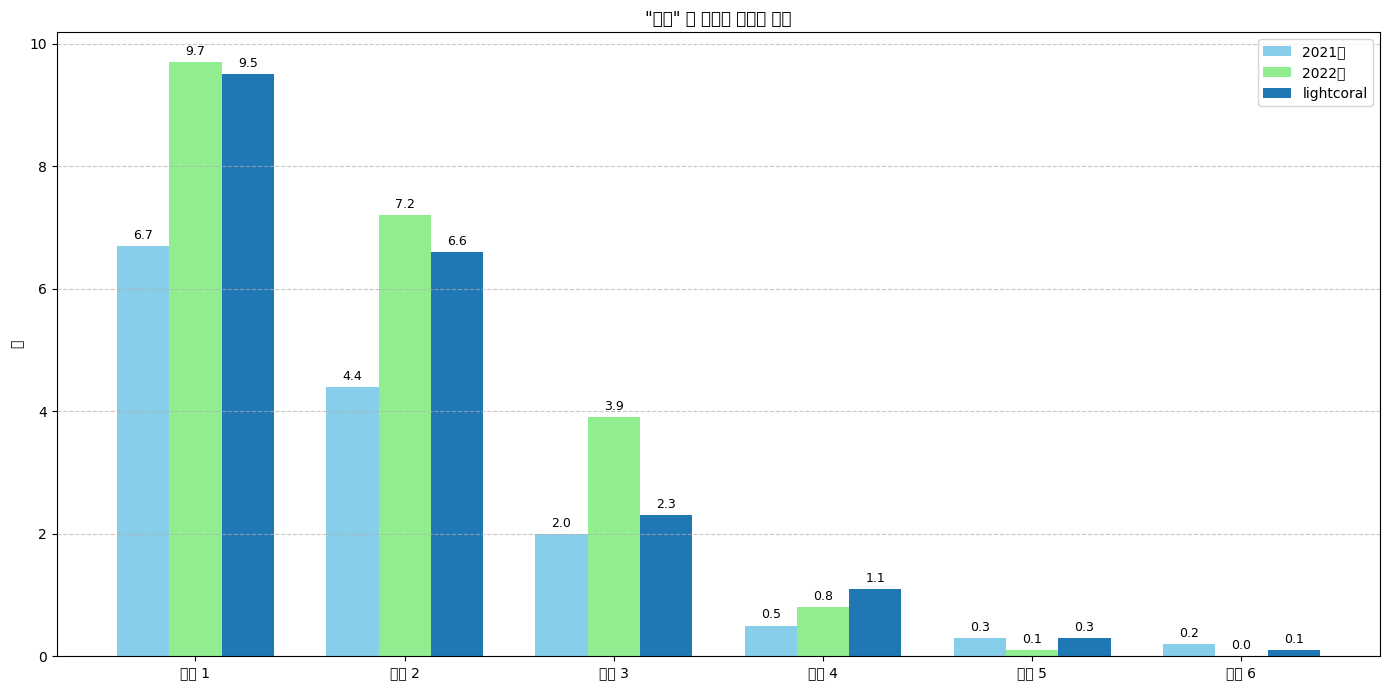

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set Korean font
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# Assuming extend_df is already loaded

# Define the categories (based on the .1 to .6 suffixes)
categories = ['구간 1', '구간 2', '구간 3', '구간 4', '구간 5', '구간 6']
years = ['2021', '2022', '2023']

# Find the "소계" row
sogye_row = extend_df[extend_df['구분별(2)'] == '소계'].iloc[0]

# Extract the data for each year
data_2021 = [sogye_row[f'2021.{i}'] for i in range(1, 7)]
data_2022 = [sogye_row[f'2022.{i}'] for i in range(1, 7)]
data_2023 = [sogye_row[f'2023.{i}'] for i in range(1, 7)]

# Convert data to numeric (in case it's read as object)
data_2021 = pd.to_numeric(data_2021, errors='coerce').tolist()
data_2022 = pd.to_numeric(data_2022, errors='coerce').tolist()
data_2023 = pd.to_numeric(data_2023, errors='coerce').tolist()

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width, data_2021, width, label='2021년', color='skyblue')
rects2 = ax.bar(x, data_2022, width, label='2022년', color='lightgreen')
rects3 = ax.bar(x + width, data_2023, width, label='lightcoral')

# Add some text for labels, title and axes ticks
ax.set_ylabel('값') # Adjust label as needed (e.g., '비율 (%)', '응답 수')
ax.set_title('"소계" 행 연도별 데이터 비교')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if not np.isnan(height):
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [40]:
extend_df.head(2)

,구분별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,...,2022.8,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8
0,구분별(2),사례수 (가구원),1%~10% 미만 (%),10%~20% 미만 (%),20%~30% 미만 (%),30%~40% 미만 (%),40%~50% 미만 (%),50% 이상 (%),이용료가 인상된다면 이용할 의향이 없다 (%),비이용 (%),...,비이용 (%),사례수 (가구원),1%~10% 미만 (%),10%~20% 미만 (%),20%~30% 미만 (%),30%~40% 미만 (%),40%~50% 미만 (%),50% 이상 (%),이용료가 인상된다면 이용할 의향이 없다 (%),비이용 (%)
1,소계,35626,6.7,4.4,2.0,0.5,0.3,0.2,5.1,80.7,...,71.9,29222,9.5,6.6,2.3,1.1,0.3,0.1,5.1,75.0


<ipython-input-43-f1e013361139>:64: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-43-f1e013361139>:64: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-43-f1e013361139>:64: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-43-f1e013361139>:64: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-43-f1e013361139>:64: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-43-f1e013361139>:64: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-43-f1e013361139>:64: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipyth

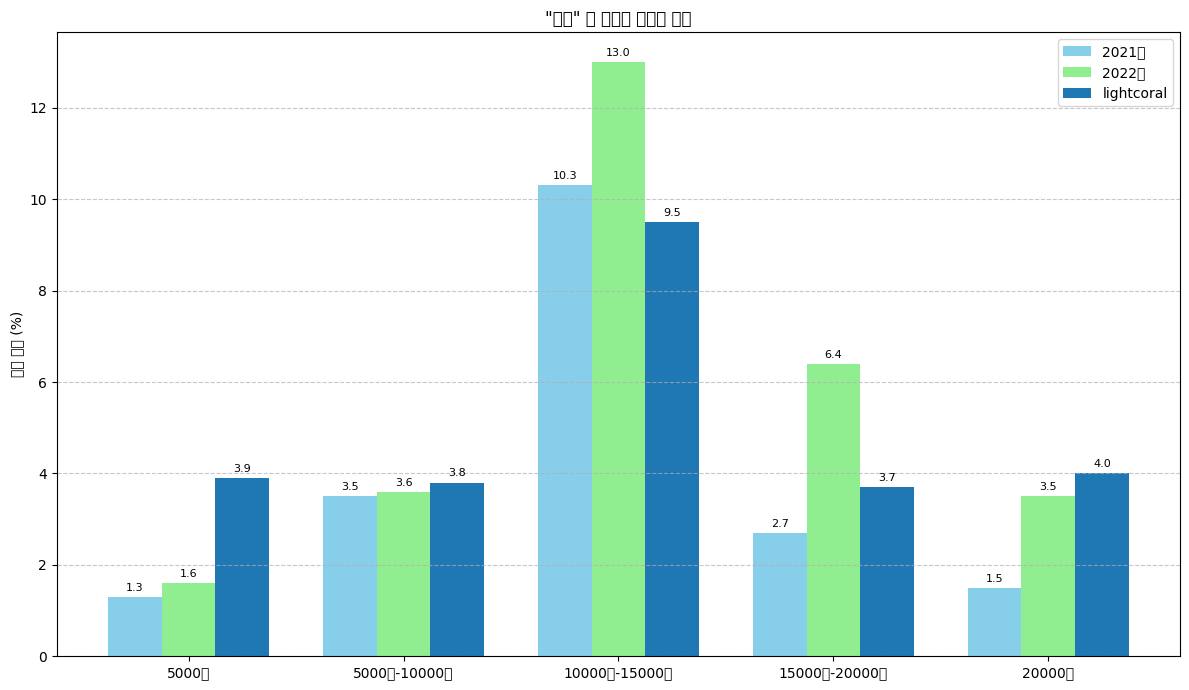

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm

# --- 폰트 설정 ---
font_path = '/content/drive/MyDrive/Colab Notebooks/NanumGothic.ttf'  # 실제 나눔고딕.ttf 파일 경로로 수정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
# --- 폰트 설정 끝 ---

# Assuming amount_df is already loaded

# Define the categories based on the example data
categories = ['5000원 미만 (%)', '5000원-10000원  미만 (%)', '10000원-15000원  미만 (%)', '15000원-20000원  미만 (%)', '20000원 이상 (%)']
years = ['2021', '2022', '2023']

# Find the "소계" row
sogye_row = amount_df[amount_df['구분별(2)'] == '소계'].iloc[0]

# Extract the data for each year
data_2021 = [sogye_row[f'2021.{i}'] for i in range(1, 6)]
data_2022 = [sogye_row[f'2022.{i}'] for i in range(1, 6)]
data_2023 = [sogye_row[f'2023.{i}'] for i in range(1, 6)]

# Convert data to numeric (in case it's read as object)
data_2021 = pd.to_numeric(data_2021, errors='coerce').tolist()
data_2022 = pd.to_numeric(data_2022, errors='coerce').tolist()
data_2023 = pd.to_numeric(data_2023, errors='coerce').tolist()

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width, data_2021, width, label='2021년', color='skyblue')
rects2 = ax.bar(x, data_2022, width, label='2022년', color='lightgreen')
rects3 = ax.bar(x + width, data_2023, width, label='lightcoral')

# Add some text for labels, title and axes ticks
ax.set_ylabel('응답 비율 (%)')
ax.set_title('"소계" 행 연도별 데이터 비교')
ax.set_xticks(x)
ax.set_xticklabels([cat.split(' ')[0] for cat in categories])
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if not np.isnan(height):
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-48-54585047cc89>:76: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-48-54585047cc89>:76: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-48-54585047cc89>:76: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-48-54585047cc89>:76: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-48-54585047cc89>:76: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-48-54585047cc89>:76: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipython-input-48-54585047cc89>:76: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
<ipy

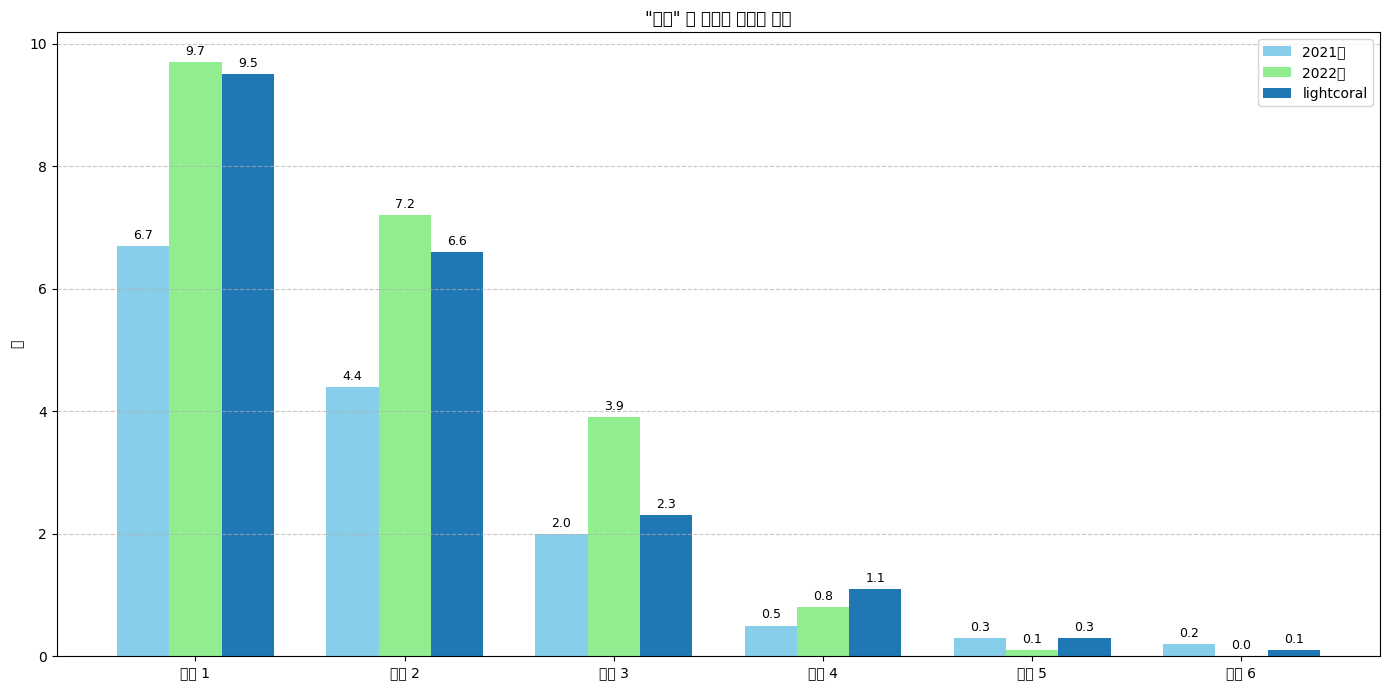

In [48]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# --- 폰트 매니저 업데이트 (Colab 환경) ---
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 폰트 캐시 삭제 후 재생성 (Colab 환경)


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm

# --- 폰트 설정 ---
font_path = '/content/drive/MyDrive/Colab Notebooks/NanumGothic.ttf'  # 실제 나눔고딕.ttf 파일 경로로 수정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
# --- 폰트 설정 끝 ---

# Assuming extend_df is already loaded

# Define the categories (based on the .1 to .6 suffixes)
categories = ['구간 1', '구간 2', '구간 3', '구간 4', '구간 5', '구간 6']
years = ['2021', '2022', '2023']

# Find the "소계" row
sogye_row = extend_df[extend_df['구분별(2)'] == '소계'].iloc[0]

# Extract the data for each year
data_2021 = [sogye_row[f'2021.{i}'] for i in range(1, 7)]
data_2022 = [sogye_row[f'2022.{i}'] for i in range(1, 7)]
data_2023 = [sogye_row[f'2023.{i}'] for i in range(1, 7)]

# Convert data to numeric (in case it's read as object)
data_2021 = pd.to_numeric(data_2021, errors='coerce').tolist()
data_2022 = pd.to_numeric(data_2022, errors='coerce').tolist()
data_2023 = pd.to_numeric(data_2023, errors='coerce').tolist()

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width, data_2021, width, label='2021년', color='skyblue')
rects2 = ax.bar(x, data_2022, width, label='2022년', color='lightgreen')
rects3 = ax.bar(x + width, data_2023, width, label='lightcoral')

# Add some text for labels, title and axes ticks
ax.set_ylabel('값') # Adjust label as needed (e.g., '비율 (%)', '응답 수')
ax.set_title('"소계" 행 연도별 데이터 비교')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if not np.isnan(height):
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()